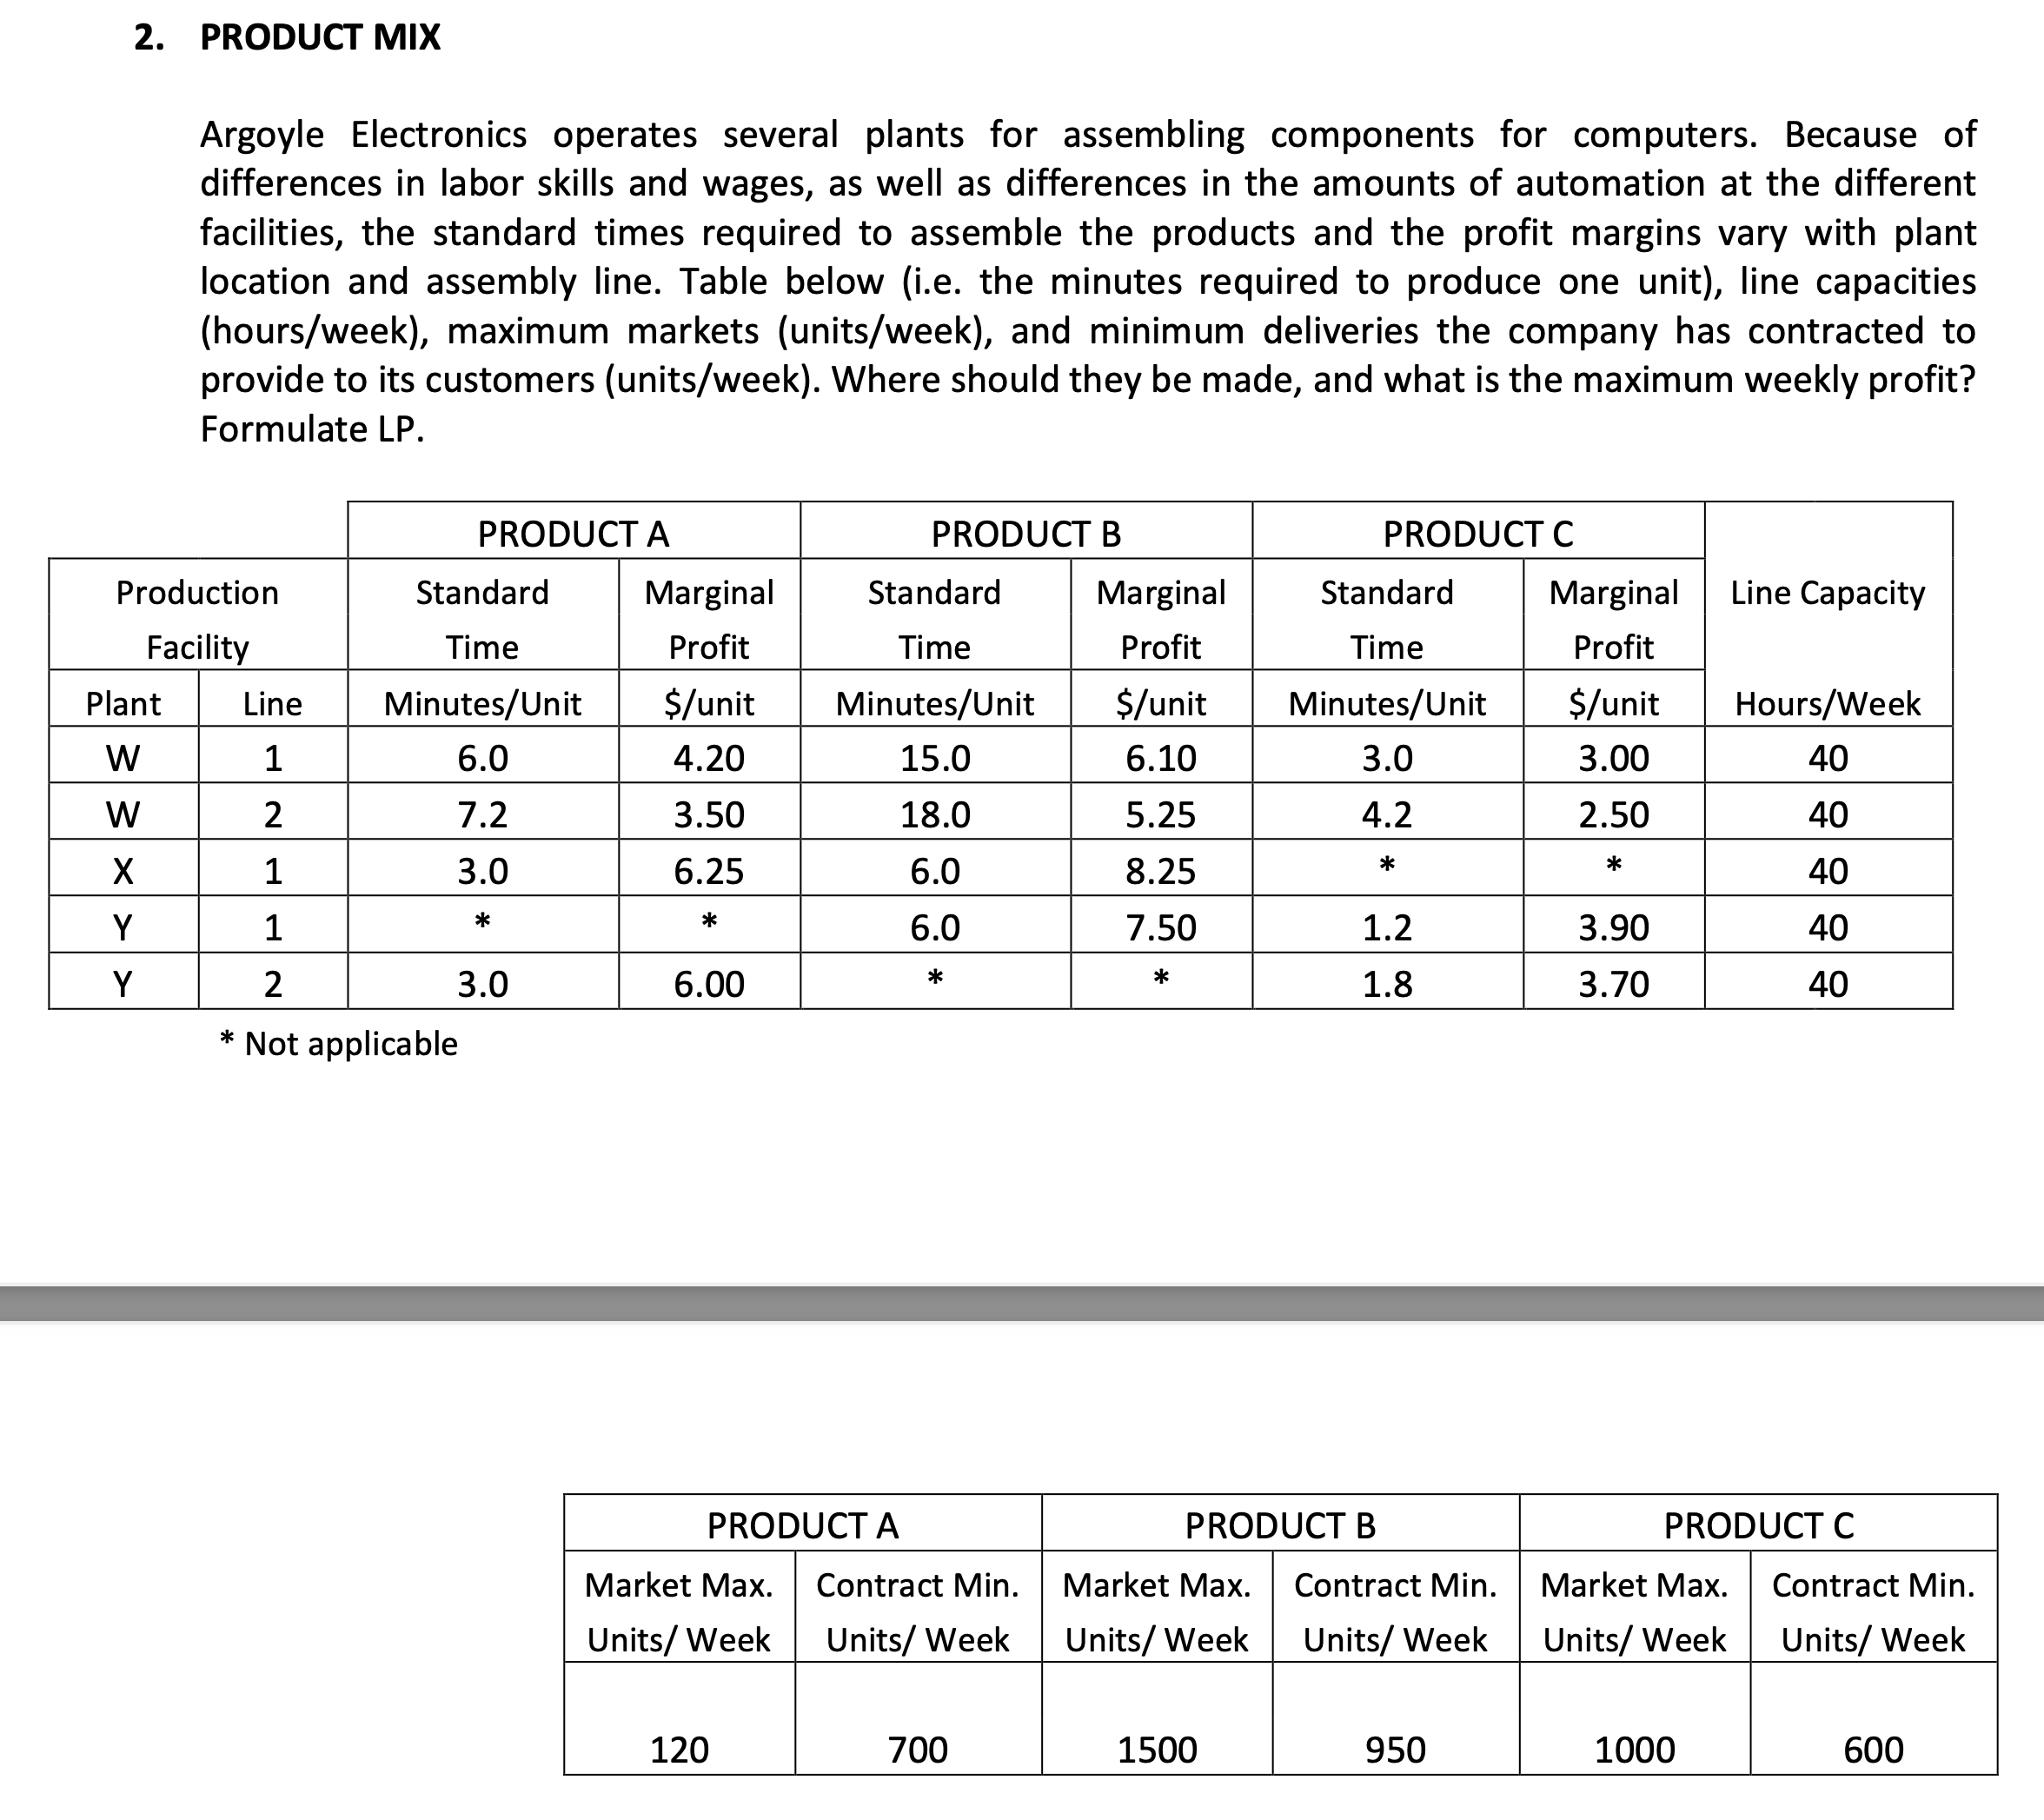

In [5]:
from pulp import *
import pandas as pd

In [43]:
# Create a LP Minimization problem
model = LpProblem("Product Mix", LpMaximize)

# Define decision variables
products = ['A', 'B', 'C']
facilities = ['W1', 'W2', 'X1', 'Y1', 'Y2']
x = LpVariable.dicts("unit", [(i, j) for i in products for j in facilities], lowBound=0, cat='Integer')

# Define the objective function
profit_coefficients = {
    ('A', 'W1'): 4.20, ('B', 'W1'): 6.10, ('C', 'W1'): 3.00,
    ('A', 'W2'): 3.50, ('B', 'W2'): 5.25, ('C', 'W2'): 2.50,
    ('A', 'X1'): 6.25, ('B', 'X1'): 8.25, ('C', 'X1'): 0.00,
    ('A', 'Y1'): 0.00, ('B', 'Y1'): 7.50, ('C', 'Y1'): 3.90,
    ('A', 'Y2'): 6.00, ('B', 'Y2'): 0.00, ('C', 'Y2'): 3.70
}

model += lpSum(profit_coefficients[(i, j)] * x[(i, j)] for i in products for j in facilities)

# Define constraints
time_coefficients = {
    ('A', 'W1'): 6.0, ('B', 'W1'): 15.0, ('C', 'W1'): 3.0,
    ('A', 'W2'): 7.2, ('B', 'W2'): 18.0, ('C', 'W2'): 4.2,
    ('A', 'X1'): 3.0, ('B', 'X1'): 6.0, ('C', 'X1'): 0.0,
    ('A', 'Y1'): 0.0, ('B', 'Y1'): 6.0, ('C', 'Y1'): 1.2,
    ('A', 'Y2'): 3.0, ('B', 'Y2'): 0.0, ('C', 'Y2'): 1.8
}

facility_capacity = {
    'W1': 40*60, 'W2': 40*60, 'X1': 40*60, 'Y1': 40*60, 'Y2': 40*60
}

market_constraints = {
    # 'A': 120, 'B': 1500, 'C': 1000
    'A': 1200, 'B': 1500, 'C': 1000
}

contract_constraints = {
    'A': 700, 'B': 950, 'C': 600
}

for j in facilities:
    # Line Capacity
    model += lpSum(time_coefficients[(i, j)] * x[(i, j)] for i in products) <= facility_capacity[j]
    
for i in products:
    # Market Max
    model += lpSum(x[(i, j)] for j in facilities) <= market_constraints[i]
    
    # Contract Min
    model += lpSum(x[(i, j)] for j in facilities) >= contract_constraints[i]

print(model)

# Solve the problem
model.solve()

# Print the results
print("Status:", LpStatus[model.status])

print("Optimal Production Plan:")
for var in model.variables():
    print(var.name, "=", var.varValue)

max_weekly_profit = model.objective
print("Maximum Weekly Profit:", value(max_weekly_profit))


Product_Mix:
MAXIMIZE
4.2*unit_('A',_'W1') + 3.5*unit_('A',_'W2') + 6.25*unit_('A',_'X1') + 6.0*unit_('A',_'Y2') + 6.1*unit_('B',_'W1') + 5.25*unit_('B',_'W2') + 8.25*unit_('B',_'X1') + 7.5*unit_('B',_'Y1') + 3.0*unit_('C',_'W1') + 2.5*unit_('C',_'W2') + 3.9*unit_('C',_'Y1') + 3.7*unit_('C',_'Y2') + 0.0
SUBJECT TO
_C1: 6 unit_('A',_'W1') + 15 unit_('B',_'W1') + 3 unit_('C',_'W1') <= 2400

_C2: 7.2 unit_('A',_'W2') + 18 unit_('B',_'W2') + 4.2 unit_('C',_'W2') <= 2400

_C3: 3 unit_('A',_'X1') + 6 unit_('B',_'X1') <= 2400

_C4: 6 unit_('B',_'Y1') + 1.2 unit_('C',_'Y1') <= 2400

_C5: 3 unit_('A',_'Y2') + 1.8 unit_('C',_'Y2') <= 2400

_C6: unit_('A',_'W1') + unit_('A',_'W2') + unit_('A',_'X1') + unit_('A',_'Y1')
 + unit_('A',_'Y2') <= 1200

_C7: unit_('A',_'W1') + unit_('A',_'W2') + unit_('A',_'X1') + unit_('A',_'Y1')
 + unit_('A',_'Y2') >= 700

_C8: unit_('B',_'W1') + unit_('B',_'W2') + unit_('B',_'X1') + unit_('B',_'Y1')
 + unit_('B',_'Y2') <= 1500

_C9: unit_('B',_'W1') + unit_('B',_'W2'

Solution (Uncorrected Limits)
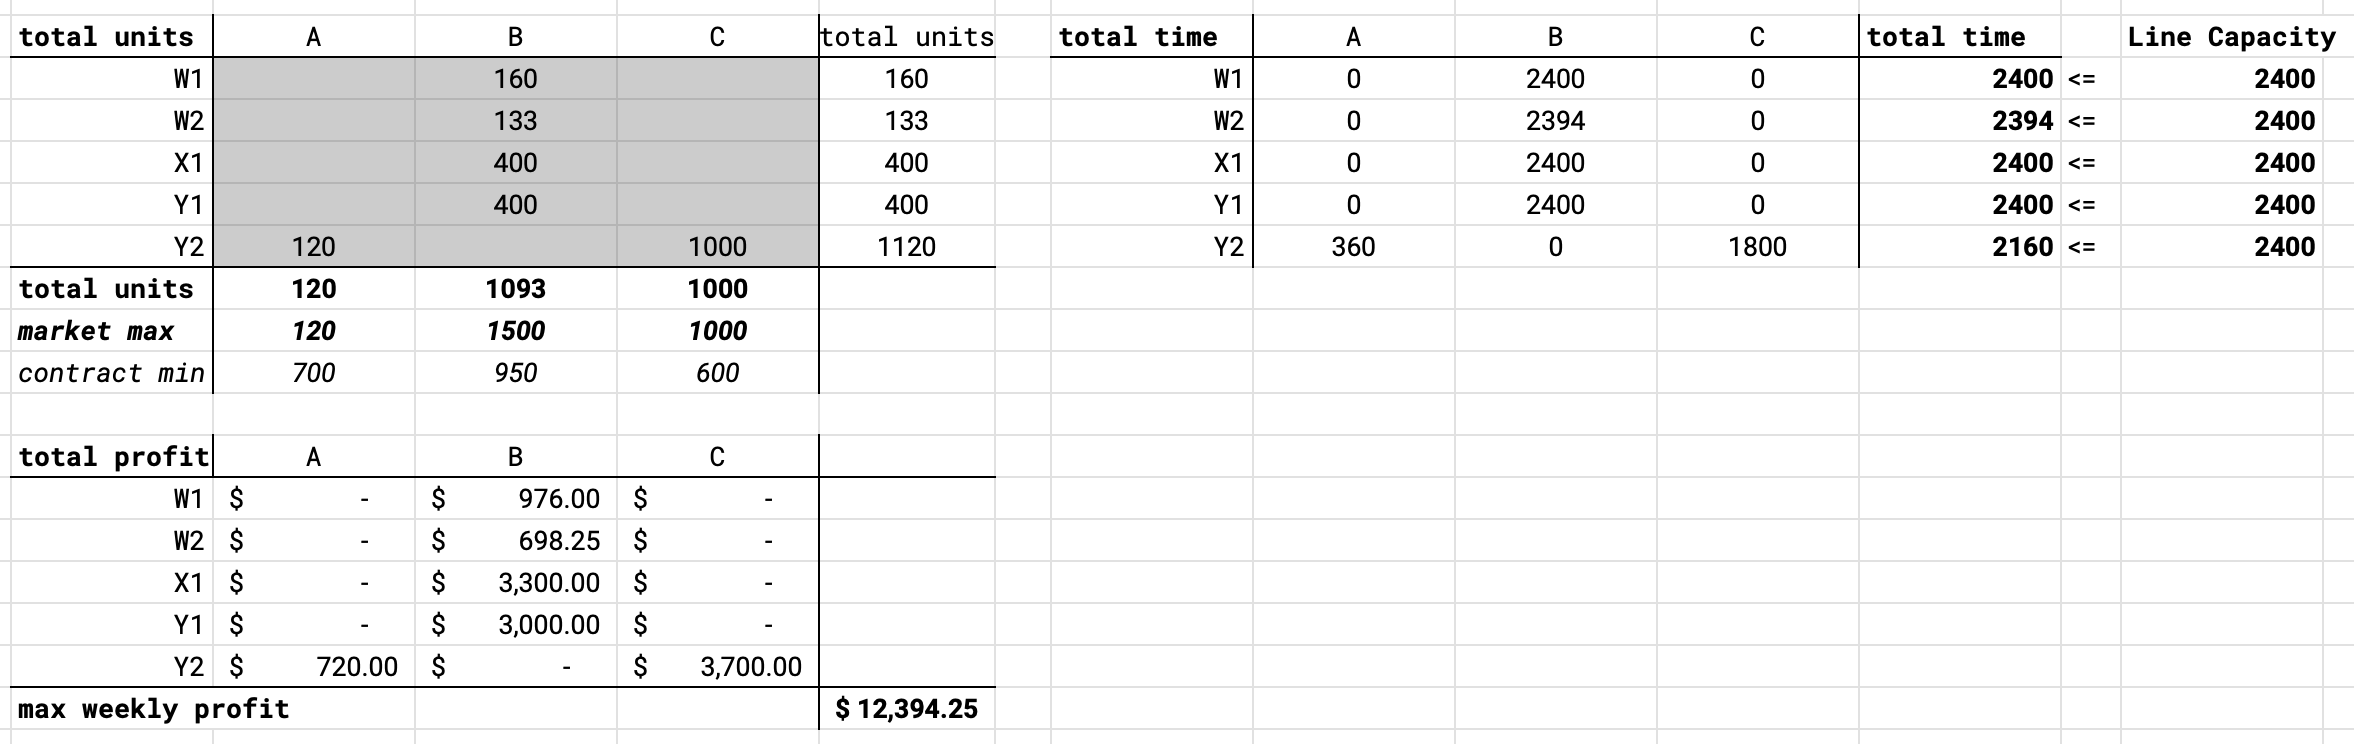<br>

Solution 2 (Corrected Limits)
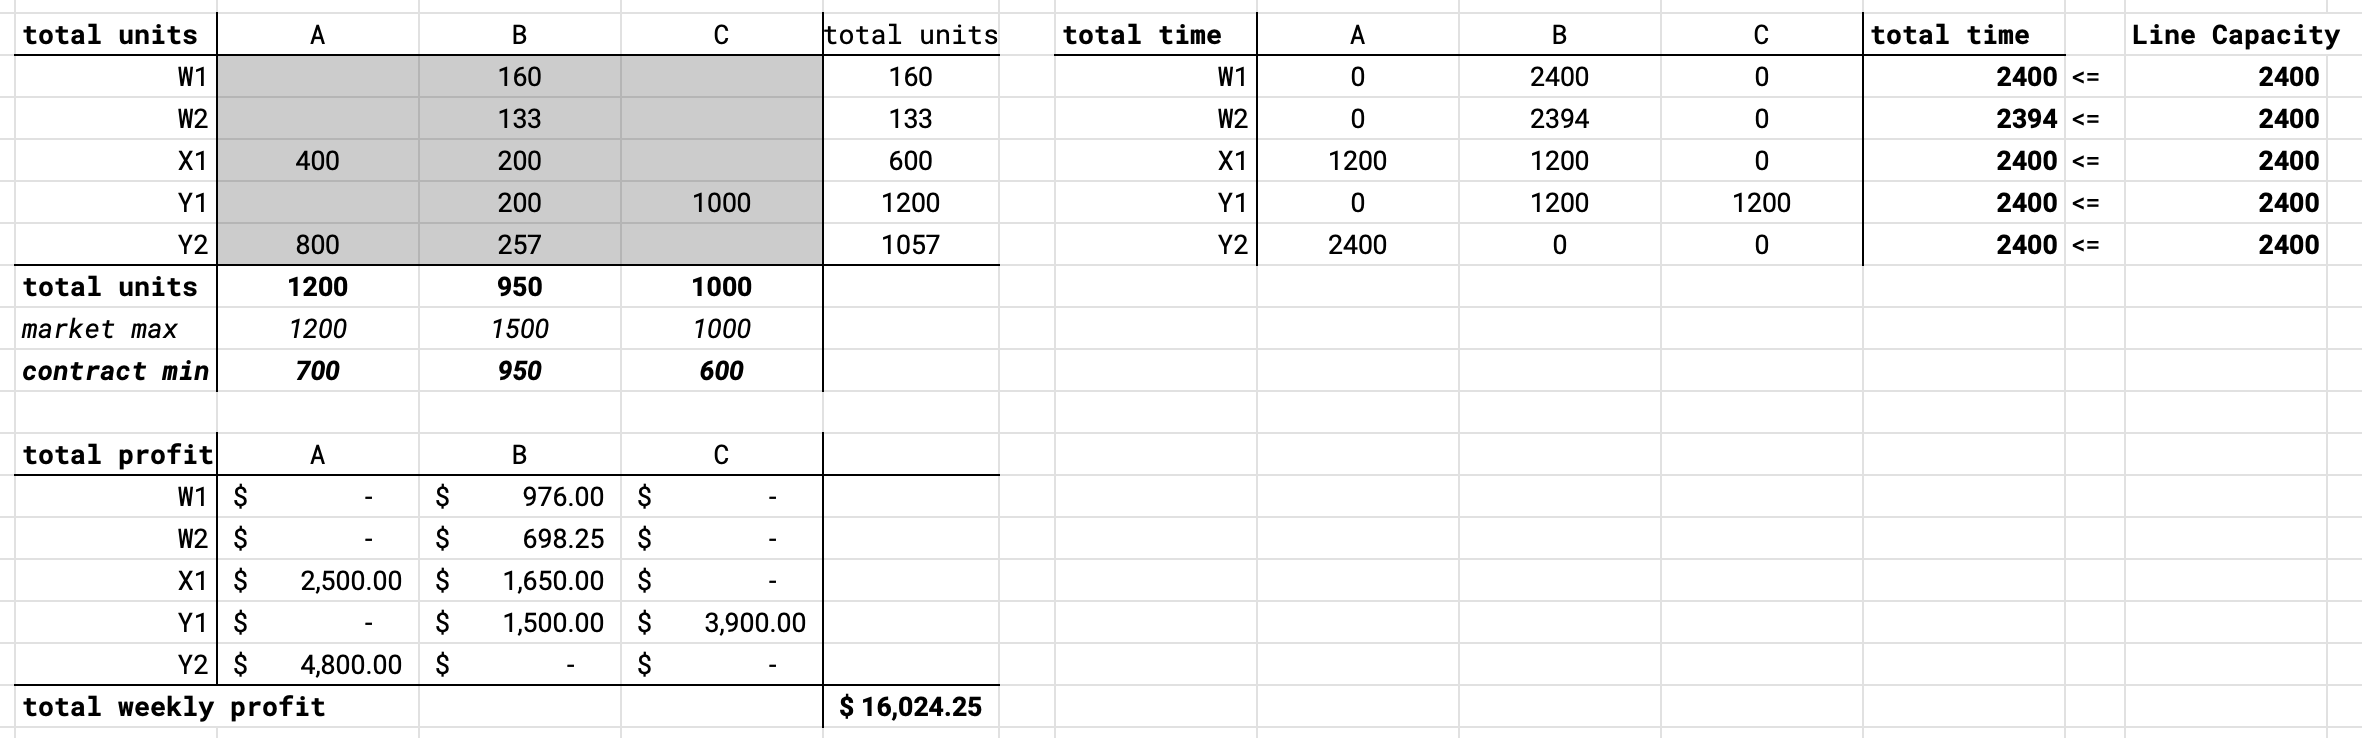

In [30]:
# Initialize the LP
model = LpProblem('Product Mix', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], lowBound=0, cat='Integer') # Products and Plants

print("Variable Map")
df = pd.DataFrame({'Plants': ['W1', 'W2', 'X1', 'Y1', 'Y2'],
                   'A': ['x1', 'x4', 'x7', 'x10', 'x13'],
                   'B': ['x2', 'x5', 'x8', 'x11', 'x14'],
                   'C': ['x3', 'x6', 'x9', 'x12', 'x15']
                   })
print(df)

# Objective Function
model += 4.20 * x[1] + 6.10 * x[2] + 3.00 * x[3] + \
         3.50 * x[4] + 5.25 * x[5] + 2.50 * x[6] + \
         6.25 * x[7] + 8.25 * x[8] + 0.00 * x[9] + \
         0.00 * x[10] + 7.50 * x[11] + 3.90 * x[12] + \
         6.00 * x[13] + 0.00 * x[14] + 3.70 * x[15]

# Add Constraints
# Line Capacity
model += 6.0 * x[1] + 15.0 * x[2] + 3.0 * x[3] <= 40 * 60, "Plant W Line 1"
model += 7.2 * x[4] + 18.0 * x[5] + 4.2 * x[6] <= 40 * 60, "Plant W Line 2"
model += 3.0 * x[7] + 6.0 * x[8] <= 40 * 60, "Plant X Line 1"
model += 6.0 * x[11] + 1.2 * x[12] <= 40 * 60, "Plant Y Line 1"
model += 3.0 * x[13] + 1.8 * x[15] <= 40 * 60, "Plant Y Line 2"

# Market Max
model += x[1] + x[4] + x[7] + x[13] <= 120, "Product A Market Max"
model += x[2] + x[5] + x[8] + x[11] <= 1500, "Product B Market Max"
model += x[3] + x[6] + x[12] + x[15] <= 1000, "Product C Market Max"

# Contract Min
model += x[1] + x[4] + x[7] + x[13] >= 700, "Product A Contract Min"
model += x[2] + x[5] + x[8] + x[11] >= 950, "Product B Contract Min"
model += x[3] + x[6] + x[12] + x[15] >= 600, "Product C Contract Min"

print(model)

# Solve the model
model.solve()

# Print the results
print("Status:", LpStatus[model.status])

print("Optimal Production Plan:")
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
max_profit = value(model.objective)
print(f"Maximum Weekly Profit = {max_profit}")

Variable Map
  Plants    A    B    C
0     W1   x1   x2   x3
1     W2   x4   x5   x6
2     X1   x7   x8   x9
3     Y1  x10  x11  x12
4     Y2  x13  x14  x15
Product_Mix:
MAXIMIZE
4.2*x_1 + 7.5*x_11 + 3.9*x_12 + 6.0*x_13 + 3.7*x_15 + 6.1*x_2 + 3.0*x_3 + 3.5*x_4 + 5.25*x_5 + 2.5*x_6 + 6.25*x_7 + 8.25*x_8 + 0.0
SUBJECT TO
Plant_W_Line_1: 6 x_1 + 15 x_2 + 3 x_3 <= 2400

Plant_W_Line_2: 7.2 x_4 + 18 x_5 + 4.2 x_6 <= 2400

Plant_X_Line_1: 3 x_7 + 6 x_8 <= 2400

Plant_Y_Line_1: 6 x_11 + 1.2 x_12 <= 2400

Plant_Y_Line_2: 3 x_13 + 1.8 x_15 <= 2400

Product_A_Market_Max: x_1 + x_13 + x_4 + x_7 <= 120

Product_B_Market_Max: x_11 + x_2 + x_5 + x_8 <= 1500

Product_C_Market_Max: x_12 + x_15 + x_3 + x_6 <= 1000

Product_A_Contract_Min: x_1 + x_13 + x_4 + x_7 >= 700

Product_B_Contract_Min: x_11 + x_2 + x_5 + x_8 >= 950

Product_C_Contract_Min: x_12 + x_15 + x_3 + x_6 >= 600

VARIABLES
0 <= x_1 Integer
0 <= x_11 Integer
0 <= x_12 Integer
0 <= x_13 Integer
0 <= x_15 Integer
0 <= x_2 Integer
0 <= x_3 I